<a href="https://colab.research.google.com/github/Nagashunmugam/credit-card-fraud-detection-/blob/main/Copy_of_credit_card_fraud_detection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Loaded: amt.csv
First few rows:
  gender         city state    zip  city_pop                            job  \
0      M      Lincoln    NE  68516    266032     Research scientist (maths)   
1      M  Easthampton    MA   1027     17660         Special effects artist   
2      M     Hastings    MI  49058     19127     Regulatory affairs officer   
3      F    Homestead    FL  33030    155317                 Phytotherapist   
4      F    Hillsboro    IL  62049      8470  Speech and language therapist   

   age                         profile  trans_date  trans_time  \
0   35     adults_2550_male_urban.json  19-05-2019         8.0   
1   42     adults_2550_male_urban.json  10-07-2019         6.0   
2   86     adults_50up_male_urban.json  22-12-2019         6.0   
3   28   adults_2550_female_urban.json  26-12-2018         7.0   
4   20  young_adults_female_urban.json  09-02-2020         7.0   

         category  amt  is_fraud             merchant  
0    shopping_pos  4.0       0.0       

<ipython-input-4-8dce6ab587e2>:26: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')
<ipython-input-4-8dce6ab587e2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')
<ipython-input-4-8dce6ab587e2>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('trans_date')['amt'].resample('M').sum().plot()


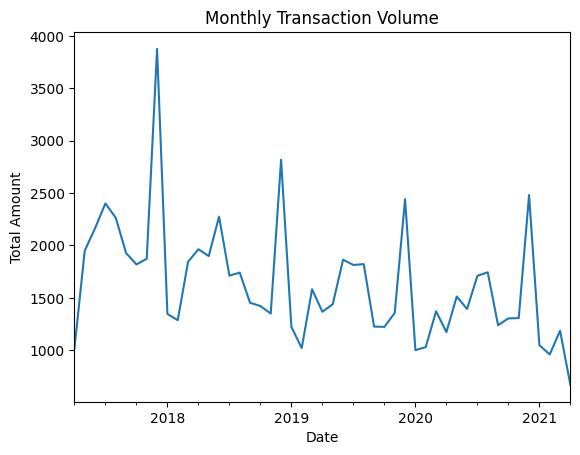

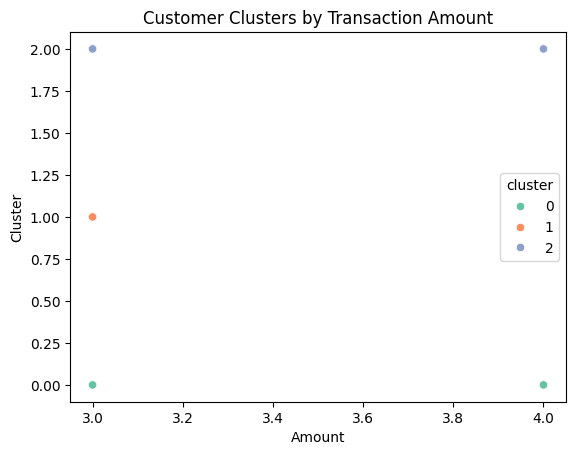


Potential Fraudulent Transactions:
      gender              city state    zip  city_pop  \
123        F       Los Angeles    CA  90006   2383912   
262        F       Los Angeles    CA  90006   2383912   
288        F       Los Angeles    CA  90006   2383912   
417        F       Los Angeles    CA  90006   2383912   
433        F       Los Angeles    CA  90006   2383912   
...      ...               ...   ...    ...       ...   
13000      F  Rancho Cucamonga    CA  91730    101719   
13029      F  Rancho Cucamonga    CA  91730    101719   
13377      F       Los Angeles    CA  90006   2383912   
13436      F        Pittsburgh    PA  15221    687276   
23346      F       Los Angeles    CA  90006   2383912   

                                                     job  age  \
123    Historic buildings inspector/conservation officer   79   
262    Historic buildings inspector/conservation officer   77   
288    Historic buildings inspector/conservation officer   76   
417    Historic bui

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Use the uploaded file directly
file_name = "amt.csv"

# Read the file
df = pd.read_csv(file_name)
print(f"\nLoaded: {file_name}")

# Inspect data
print("First few rows:")
print(df.head())
print("\nInfo:")
print(df.info())

# Handle missing values
df = df.dropna()

# Convert date column if it exists
if 'trans_date' in df.columns:
    df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualization: Total amount over time
if 'trans_date' in df.columns and 'amt' in df.columns:
    df.set_index('trans_date')['amt'].resample('M').sum().plot()
    plt.title("Monthly Transaction Volume")
    plt.ylabel("Total Amount")
    plt.xlabel("Date")
    plt.show()

# Clustering: Customer behavior profiling
if 'amt' in df.columns:
    X = df_encoded.select_dtypes(include='number')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # Plot clusters
    sns.scatterplot(x=df['amt'], y=df['cluster'], hue=df['cluster'], palette="Set2")
    plt.title("Customer Clusters by Transaction Amount")
    plt.xlabel("Amount")
    plt.ylabel("Cluster")
    plt.show()

    # Fraud Detection using Isolation Forest
    iso = IsolationForest(contamination=0.01, random_state=42)
    df['is_fraud_pred'] = iso.fit_predict(X_scaled)
    df['is_fraud_pred'] = df['is_fraud_pred'].map({1: 0, -1: 1})  # 1 = Fraudulent

    print("\nPotential Fraudulent Transactions:")
    print(df[df['is_fraud_pred'] == 1])
else:
    print("Column 'amt' not found for clustering and fraud detection.")


In [ ]:
# After encoding and dropping missing values
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.dropna()  # drop missing rows

# Then scale:
X = df_encoded.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_scaled)

# Predict anomalies
predictions = iso.predict(X_scaled)  # length == number of rows in df_encoded

# Add predictions as a new column in df_encoded, NOT df
df_encoded['is_fraud_pred'] = [0 if p == 1 else 1 for p in predictions]

# If you want to link back to original df, you must keep track of dropped rows properly



In [ ]:
print( df.dropna())

  gender         city state    zip  city_pop                            job  \
0      M      Lincoln    NE  68516    266032     Research scientist (maths)   
1      M  Easthampton    MA   1027     17660         Special effects artist   
2      M     Hastings    MI  49058     19127     Regulatory affairs officer   
3      F    Homestead    FL  33030    155317                 Phytotherapist   
4      F    Hillsboro    IL  62049      8470  Speech and language therapist   

   age                         profile trans_date  trans_time        category  \
0   35     adults_2550_male_urban.json 2019-05-19         8.0    shopping_pos   
1   42     adults_2550_male_urban.json 2019-07-10         6.0   entertainment   
2   86     adults_50up_male_urban.json 2019-12-22         6.0            home   
3   28   adults_2550_female_urban.json 2018-12-26         7.0    shopping_pos   
4   20  young_adults_female_urban.json 2020-02-09         7.0  health_fitness   

   amt  is_fraud             merchant 

In [ ]:
# After encoding and dropping missing values
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.dropna()  # drop missing rows

# Then scale:
X = df_encoded.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_scaled)

# Predict anomalies
predictions = iso.predict(X_scaled)  # length == number of rows in df_encoded

# Add predictions as a new column in df_encoded, NOT df
df_encoded['is_fraud_pred'] = [0 if p == 1 else 1 for p in predictions]

# If you want to link back to original df, you must keep track of dropped rows properly


In [ ]:
# Print first 10 rows of predictions
print("First 10 predictions (0=normal, 1=fraud):")
print(df_encoded['is_fraud_pred'].head(10))

# Show how many frauds detected
print("\nTotal potential fraud cases detected:", df_encoded['is_fraud_pred'].sum())

# Show example rows flagged as fraud
print("\nSample fraudulent transactions:")
print(df_encoded[df_encoded['is_fraud_pred'] == 1].head())


First 10 predictions (0=normal, 1=fraud):
0    0
1    0
2    1
3    0
4    0
Name: is_fraud_pred, dtype: int64

Total potential fraud cases detected: 1

Sample fraudulent transactions:
     zip  city_pop  age trans_date  trans_time  amt  is_fraud  cluster  \
2  49058     19127   86 2019-12-22         6.0  4.0       0.0        2   

   is_fraud_pred  gender_M  ...  profile_adults_2550_male_urban.json  \
2              1      True  ...                                False   

   profile_adults_50up_male_urban.json  \
2                                 True   

   profile_young_adults_female_urban.json  category_health_fitness  \
2                                   False                    False   

   category_home  category_shopping_pos  merchant_fraud_Dare  \
2           True                  False                False   

   merchant_fraud_Skiles LLC  merchant_fraud_Watsica  \
2                       True                   False   

   merchant_fraud_Wilkinson Ltd  
2                  

In [ ]:
# Example preprocessing
df_processed = df.copy()

# Drop rows with missing values (if any)
df_processed.dropna(inplace=True)

# If there's a datetime column, convert it
# Example: df_processed['trans_date'] = pd.to_datetime(df_processed['trans_date'])

# Encode categorical columns if needed
# For example: df_processed = pd.get_dummies(df_processed, columns=['gender', 'job'], drop_first=True)

# Display processed data (Data Processing)
print("Processed Dataset Shape:", df_processed.shape)
df_processed.head()


Processed Dataset Shape: (5, 16)


,gender,city,state,zip,city_pop,job,age,profile,trans_date,trans_time,category,amt,is_fraud,merchant,cluster,is_fraud_pred
0,M,Lincoln,NE,68516,266032,Research scientist (maths),35,adults_2550_male_urban.json,2019-05-19,8.0,shopping_pos,4.0,0.0,fraud_Watsica,2,0
1,M,Easthampton,MA,1027,17660,Special effects artist,42,adults_2550_male_urban.json,2019-07-10,6.0,entertainment,4.0,0.0,fraud_Wilkinson Ltd,2,0
2,M,Hastings,MI,49058,19127,Regulatory affairs officer,86,adults_50up_male_urban.json,2019-12-22,6.0,home,4.0,0.0,fraud_Skiles LLC,2,0
3,F,Homestead,FL,33030,155317,Phytotherapist,28,adults_2550_female_urban.json,2018-12-26,7.0,shopping_pos,4.0,0.0,fraud_Bins,2,0
4,F,Hillsboro,IL,62049,8470,Speech and language therapist,20,young_adults_female_urban.json,2020-02-09,7.0,health_fitness,4.0,0.0,fraud_Dare,2,0


from matplotlib import pyplot as plt
_df_0['zip'].plot(kind='hist', bins=20, title='zip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['city_pop'].plot(kind='hist', bins=20, title='city_pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['trans_time'].plot(kind='hist', bins=20, title='trans_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='zip', y='city_pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='city_pop', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='age', y='trans_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trans_date']
  ys = series['zip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('trans_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trans_date')
_ = plt.ylabel('zip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trans_date']
  ys = series['zip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('trans_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trans_date')
_ = plt.ylabel('zip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trans_date']
  ys = series['zip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('trans_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trans_date')
_ = plt.ylabel('zip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trans_date']
  ys = series['zip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('trans_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('job')):
  _plot_series(series, series_name, i)
  fig.legend(title='job', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trans_date')
_ = plt.ylabel('zip')

from matplotlib import pyplot as plt
_df_15['zip'].plot(kind='line', figsize=(8, 4), title='zip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['city_pop'].plot(kind='line', figsize=(8, 4), title='city_pop')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['trans_time'].plot(kind='line', figsize=(8, 4), title='trans_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['city'].value_counts()
    for x_label, grp in _df_19.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('city')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['state'].value_counts()
    for x_label, grp in _df_20.groupby('city')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('city')
_ = plt.ylabel('state')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['job'].value_counts()
    for x_label, grp in _df_21.groupby('state')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('state')
_ = plt.ylabel('job')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['profile'].value_counts()
    for x_label, grp in _df_22.groupby('job')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('job')
_ = plt.ylabel('profile')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='zip', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='zip', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='zip', y='state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['job'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='zip', y='job', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import joblib

# Replace `model` with the variable name of your trained model
joblib.dump(model, 'fraud_model.pkl')


NameError: name 'model' is not defined

In [ ]:
print(df.head())

  gender         city state    zip  city_pop                            job  \
0      M      Lincoln    NE  68516    266032     Research scientist (maths)   
1      M  Easthampton    MA   1027     17660         Special effects artist   
2      M     Hastings    MI  49058     19127     Regulatory affairs officer   
3      F    Homestead    FL  33030    155317                 Phytotherapist   
4      F    Hillsboro    IL  62049      8470  Speech and language therapist   

   age                         profile trans_date  trans_time        category  \
0   35     adults_2550_male_urban.json 2019-05-19         8.0    shopping_pos   
1   42     adults_2550_male_urban.json 2019-07-10         6.0   entertainment   
2   86     adults_50up_male_urban.json 2019-12-22         6.0            home   
3   28   adults_2550_female_urban.json 2018-12-26         7.0    shopping_pos   
4   20  young_adults_female_urban.json 2020-02-09         7.0  health_fitness   

   amt  is_fraud             merchant 

In [ ]:
print("Total fraud detected:", df_encoded['is_fraud_pred'].sum())
print("Sample flagged transactions:")
print(df_encoded[df_encoded['is_fraud_pred'] == 1].head())


Total fraud detected: 1
Sample flagged transactions:
     zip  city_pop  age trans_date  trans_time  amt  is_fraud  cluster  \
2  49058     19127   86 2019-12-22         6.0  4.0       0.0        2   

   is_fraud_pred  gender_M  ...  profile_adults_2550_male_urban.json  \
2              1      True  ...                                False   

   profile_adults_50up_male_urban.json  \
2                                 True   

   profile_young_adults_female_urban.json  category_health_fitness  \
2                                   False                    False   

   category_home  category_shopping_pos  merchant_fraud_Dare  \
2           True                  False                False   

   merchant_fraud_Skiles LLC  merchant_fraud_Watsica  \
2                       True                   False   

   merchant_fraud_Wilkinson Ltd  
2                         False  

[1 rows x 32 columns]


In [ ]:
# Get anomaly scores (the lower, the more abnormal)
anomaly_scores = iso.decision_function(X_scaled)

# Add scores to dataframe for inspection
df_encoded['anomaly_score'] = anomaly_scores

# Show some samples with lowest scores (most anomalous)
print(df_encoded.sort_values('anomaly_score').head(10))


     zip  city_pop  age trans_date  trans_time  amt  is_fraud  cluster  \
2  49058     19127   86 2019-12-22         6.0  4.0       0.0        2   
0  68516    266032   35 2019-05-19         8.0  4.0       0.0        2   
1   1027     17660   42 2019-07-10         6.0  4.0       0.0        2   
4  62049      8470   20 2020-02-09         7.0  4.0       0.0        2   
3  33030    155317   28 2018-12-26         7.0  4.0       0.0        2   

   is_fraud_pred  gender_M  ...  profile_adults_50up_male_urban.json  \
2              1      True  ...                                 True   
0              0      True  ...                                False   
1              0      True  ...                                False   
4              0     False  ...                                False   
3              0     False  ...                                False   

   profile_young_adults_female_urban.json  category_health_fitness  \
2                                   False           

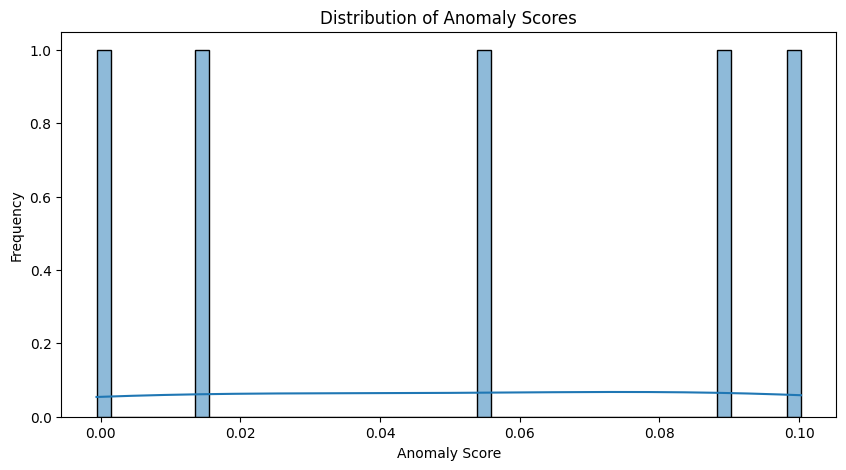

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(anomaly_scores, bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("amt.csv")


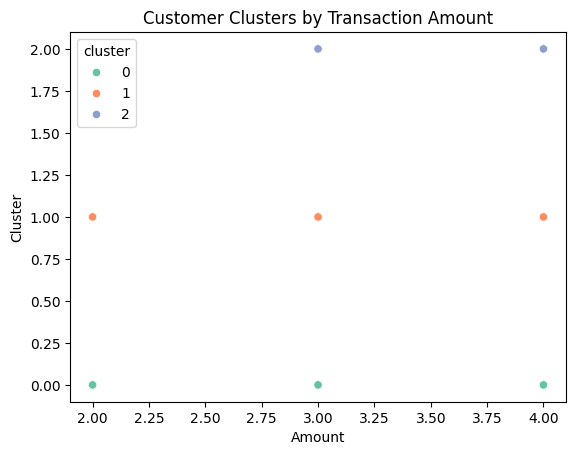

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Drop missing values
df = df.dropna()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize numerical features
X = df_encoded.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
sns.scatterplot(x=df['amt'], y=df['cluster'], hue=df['cluster'], palette='Set2')
plt.title("Customer Clusters by Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Cluster")
plt.show()


In [ ]:
!pip install streamlit pyngrok


In [ ]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()


Saving app.py to app.py


In [ ]:
!ngrok config add-authtoken 2xDeKZXITozDV9wPN5cpMHR3Hmz_3HgEjnfgwGvnmqHXAZazx


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
code = '''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

st.title("💳 Credit Card Fraud Detection & Clustering")

uploaded_file = st.file_uploader("Upload amt.csv file", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("### Raw Data", df.head())
    df = df.dropna()
    if 'trans_date' in df.columns:
        df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

    df_encoded = pd.get_dummies(df, drop_first=True)
    X = df_encoded.select_dtypes(include='number')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    iso = IsolationForest(contamination=0.01, random_state=42)
    df['is_fraud_pred'] = iso.fit_predict(X_scaled)
    df['is_fraud_pred'] = df['is_fraud_pred'].map({1: 0, -1: 1})

    st.write("### Clustered Data", df[['amt', 'cluster', 'is_fraud_pred']].head())

    st.write("### Cluster Plot")
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='amt', y='cluster', hue='cluster', ax=ax)
    st.pyplot(fig)

    st.write("### 🚨 Fraudulent Transactions")
    st.dataframe(df[df['is_fraud_pred'] == 1])

'''
with open("streamlit_app.py", "w") as f:
    f.write(code)


In [ ]:
!streamlit run streamlit_app.py &> streamlit_log.txt &


In [ ]:
import time
time.sleep(5)  # give streamlit time to boot


In [ ]:
from pyngrok import ngrok

ngrok.kill()  # ensure no conflicts
public_url = ngrok.connect(8501, "http")
print("Your Streamlit app is live at:", public_url)


Your Streamlit app is live at: NgrokTunnel: "https://a107-34-138-153-247.ngrok-free.app" -> "http://localhost:8501"
